In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

from models.regression import BayesianRegressor
from models.baselines import BaselineLinearRegressor
from models.baselines import BaselineLinRegressorWithDropout


In [2]:
# Regression Target
def experiment(x, eps):
    return x + 0.3 * torch.sin(2 * torch.pi * (x + eps)) + 0.3 * torch.sin(4 * torch.pi * (x + eps)) + eps
    # return -x**4 + 3*x**2 + 1


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Creating Training Data

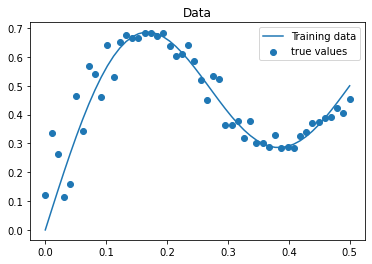

In [4]:
# toy dataset we can start with
train_samples = 50
x_train = torch.linspace(0, 0.5, train_samples).reshape(-1, 1)
eps = Normal(0, 0.02).sample(x_train.size())
y_train = experiment(x_train, eps)
y_train_true = experiment(x_train, 0)

plt.plot(x_train.numpy(), y_train_true.detach().numpy(), label='Training data')
plt.scatter(x_train, y_train, label='true values')
plt.title('Data')
plt.legend()
plt.show()


### Defining bayesian model and training

In [5]:
bayes_model = BayesianRegressor(hidden_dim=128, var_gauss=0.05, mixture_prior=False).to(device)
optimizer = optim.Adam(bayes_model.parameters(), lr=0.01)
elbo_samples = 6
epochs = 2000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    # forward + backward + optimize
    loss = bayes_model.energy_loss(x_train, y_train, elbo_samples)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')

epoch: 1/2000
Loss: 6381.22802734375
epoch: 101/2000
Loss: 2828.47998046875
epoch: 201/2000
Loss: 2510.3515625
epoch: 301/2000
Loss: 2239.084228515625
epoch: 401/2000
Loss: 2052.427734375
epoch: 501/2000
Loss: 1919.5328369140625
epoch: 601/2000
Loss: 1718.3193359375
epoch: 701/2000
Loss: 1655.691650390625
epoch: 801/2000
Loss: 1601.9547119140625
epoch: 901/2000
Loss: 1595.0560302734375
epoch: 1001/2000
Loss: 1558.29736328125
epoch: 1101/2000
Loss: 1501.7735595703125
epoch: 1201/2000
Loss: 1506.5224609375
epoch: 1301/2000
Loss: 1465.9901123046875
epoch: 1401/2000
Loss: 1416.5859375
epoch: 1501/2000
Loss: 1376.48046875
epoch: 1601/2000
Loss: 1389.9296875
epoch: 1701/2000
Loss: 1338.179931640625
epoch: 1801/2000
Loss: 1339.679931640625
epoch: 1901/2000
Loss: 1326.9765625
Finished Training


### Baseline linear regression model and training

In [6]:
baseline_linres_model = BaselineLinearRegressor(hidden_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(baseline_linres_model.parameters(), lr=0.01)
epochs = 2000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    y_train_preds = baseline_linres_model(x_train)
    # forward + backward + optimize
    loss = criterion(y_train_preds, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')

epoch: 1/2000
Loss: 0.13374148309230804
epoch: 101/2000
Loss: 0.007033292669802904
epoch: 201/2000
Loss: 0.00449468893930316
epoch: 301/2000
Loss: 0.0031534971203655005
epoch: 401/2000
Loss: 0.003075735177844763
epoch: 501/2000
Loss: 0.003061667550355196
epoch: 601/2000
Loss: 0.0030608063098043203
epoch: 701/2000
Loss: 0.003060276387259364
epoch: 801/2000
Loss: 0.003059763228520751
epoch: 901/2000
Loss: 0.003060881979763508
epoch: 1001/2000
Loss: 0.0030589732341468334
epoch: 1101/2000
Loss: 0.003063920186832547
epoch: 1201/2000
Loss: 0.0030636596493422985
epoch: 1301/2000
Loss: 0.0030577012803405523
epoch: 1401/2000
Loss: 0.0030600677710026503
epoch: 1501/2000
Loss: 0.003063081530854106
epoch: 1601/2000
Loss: 0.0030681067146360874
epoch: 1701/2000
Loss: 0.00320997997187078
epoch: 1801/2000
Loss: 0.0031061500776559114
epoch: 1901/2000
Loss: 0.0032117117661982775
Finished Training


### Baseline Linear Regression Model with Dropout Model and Training

In [7]:
baseline_lrdrop_model = BaselineLinRegressorWithDropout(hidden_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(baseline_lrdrop_model.parameters(), lr=0.01)
epochs = 5000

x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):  # loop over the dataset multiple times
    optimizer.zero_grad()
    y_train_preds = baseline_lrdrop_model(x_train)
    # forward + backward + optimize
    loss = criterion(y_train_preds, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch: {}/{}'.format(epoch + 1, epochs))
        print('Loss:', loss.item())
print('Finished Training')

epoch: 1/5000
Loss: 0.04776731878519058
epoch: 101/5000
Loss: 0.017560672014951706
epoch: 201/5000
Loss: 0.01719207689166069
epoch: 301/5000
Loss: 0.013053481467068195
epoch: 401/5000
Loss: 0.011679893359541893
epoch: 501/5000
Loss: 0.010333379730582237
epoch: 601/5000
Loss: 0.010224524885416031
epoch: 701/5000
Loss: 0.010733572766184807
epoch: 801/5000
Loss: 0.012171334587037563
epoch: 901/5000
Loss: 0.009078163653612137
epoch: 1001/5000
Loss: 0.008998853154480457
epoch: 1101/5000
Loss: 0.009105294942855835
epoch: 1201/5000
Loss: 0.01833997666835785
epoch: 1301/5000
Loss: 0.009562593884766102
epoch: 1401/5000
Loss: 0.011034212075173855
epoch: 1501/5000
Loss: 0.015585882589221
epoch: 1601/5000
Loss: 0.015473504550755024
epoch: 1701/5000
Loss: 0.010202226229012012
epoch: 1801/5000
Loss: 0.009453884325921535
epoch: 1901/5000
Loss: 0.010559211485087872
epoch: 2001/5000
Loss: 0.008362007327377796
epoch: 2101/5000
Loss: 0.008018582127988338
epoch: 2201/5000
Loss: 0.00899706780910492
epoch: 

# Results and Comparisons

In [8]:
def plot_model_reults(model, plot_title, test_samples: int = 100, exp_samples: int = 100, x_range = [-0.3, 0.8], pred_label: str = 'Model Prediction'):
    x_test = torch.linspace(x_range[0], x_range[1], test_samples).reshape(-1, 1)
    y_samp = np.zeros((exp_samples, test_samples))
    x_test = x_test.to(device)
    for s in range(exp_samples):
        y_hat = model.forward(x_test).cpu().detach().numpy()
        y_samp[s, :] = y_hat.reshape(-1)
    plt.plot(x_test.cpu().detach().numpy(), np.mean(y_samp, axis=0), label=pred_label)
    plt.plot(x_test.cpu().detach().numpy(), experiment(x_test, 0.0).cpu().detach().numpy(), 'g', label='Ground Truth')
    plt.fill_between(x_test.cpu().detach().numpy().reshape(-1), np.percentile(y_samp, 2.5, axis=0),
                    np.percentile(y_samp, 97.5, axis=0),
                    alpha=0.25, label='95% Confidence')
    plt.legend()
    plt.scatter(x_train.cpu().detach().numpy(), y_train.cpu().detach().numpy())
    plt.title(plot_title)
    plt.show()

### Bayes Model Prediction

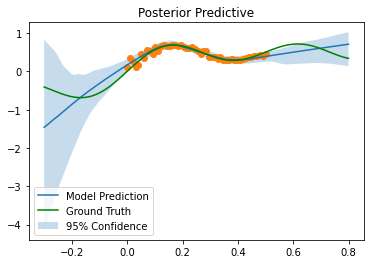

In [9]:
plot_model_reults(bayes_model, 'Posterior Predictive')

### Baseline Linear Regression Model Prediction

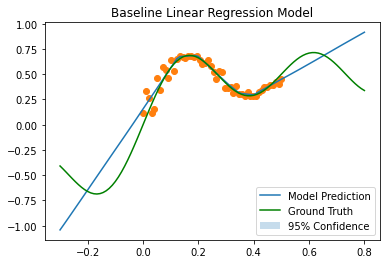

In [10]:
plot_model_reults(baseline_linres_model, 'Baseline Linear Regression Model')

### Baseline Linear Regression Model with Dropout Prediction without turning off dropout during training time!

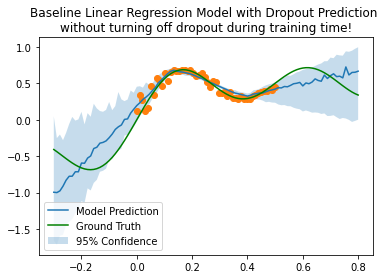

In [11]:
plot_model_reults(baseline_lrdrop_model, "Baseline Linear Regression Model with Dropout Prediction \nwithout turning off dropout during training time!")

### Baseline Linear Regression Model with Dropout Prediction

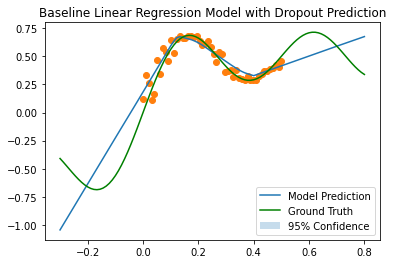

In [12]:
plot_model_reults(baseline_lrdrop_model.eval(), "Baseline Linear Regression Model with Dropout Prediction")